In [1]:
#import tarfile
import xarray
import rioxarray as rio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# file = tarfile.open('aviris.tar.gz') 
# # view names of files
# print(file.getnames())
# file.extractall('./aviris_data') 
# file.close() 

# open img file
rad = rio.open_rasterio('aviris_data/f090705t01p00r09rdn_b/f090705t01p00r09rdn_b_ort_img')
# save as hdf5
#img_file.to_netcdf('aviris_radiance.h5',engine="h5netcdf")


rad = rad.rio.set_spatial_dims(
    x_dim="x",
    y_dim="y",
    )
rad = rad.rio.write_coordinate_system("epsg:32618")

rad = rad.rename({'xc':'longitude','yc': 'latitude'})


In [9]:
rad.to_netcdf('radiance.nc', engine="netcdf4")

In [ ]:
import leafmap

band_image = leafmap.array_to_image(rad.isel(band=55),resolution=16.2,crs='EPSG:32618')

m = leafmap.Map()

m.add_raster(band_image, colormap="Greens", layer_name="band 55")
m

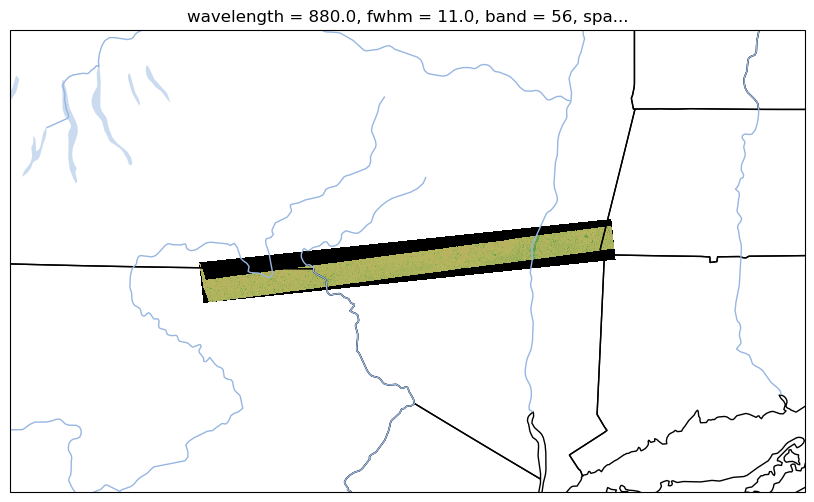

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

extent = [int(rad.longitude.min())-100000, int(rad.longitude.max()+100000),int(rad.latitude.min()-100000),int(rad.latitude.max()+100000)]
map_crs = ccrs.epsg(32618)

plt.figure(figsize=(14, 6))
ax = plt.axes(projection=map_crs)
ax.set_extent(extent, crs=map_crs)


ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)

rad.isel(band=55).plot.pcolormesh(
    ax=ax, transform=map_crs, x="longitude", y="latitude", add_colorbar=False,cmap='gist_earth')

plt.show()

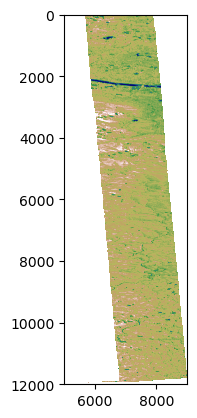

In [36]:
plt.imshow(b56,cmap='gist_earth',extent=(5000,9000.0,12000.0,0.0),clim=(0,5000)) 

In [34]:
from skimage import exposure
from IPython.html.widgets import *

def linearStretch(percent):
    pLow, pHigh = np.percentile(b56[~np.isnan(b56)], (percent,100-percent))
    img_rescale = exposure.rescale_intensity(b56, in_range=(pLow,pHigh))
    plt.imshow(img_rescale,extent=(0.0,4000.0,12000.0,0.0),cmap='gist_earth') 
    #cbar = plt.colorbar(); cbar.set_label('Reflectance')
    plt.title('SERC Band 56 \n Linear ' + str(percent) + '% Contrast Stretch'); 
    ax = plt.gca()
    ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree
    
interact(linearStretch,percent=(0,50,1))

ModuleNotFoundError: No module named 'skimage'